# Исследование данных о продажах компьютерных игр 

Перед нами исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<p>
    Для достижения заявленной цели необходимо оценить различные факторы: популярные жанры, наиболее продаваемые платформы,
    как часто появляются новые платформы и исчезают старые, что характерно для пользователей различных регионов, игры с какой
    оценкой рейтинга ESRB чаще всего покупают.
</p>

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [2]:
print(data.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

<div class="alert alert-info">
<b>
    Описание данных
    <ul>
        <li> Name — название игры</li>
        <li> Platform — платформа</li>
        <li> Year_of_Release — год выпуска</li>
        <li> Genre — жанр игры</li>
        <li> NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
        <li> EU_sales — продажи в Европе (миллионы проданных копий)</li>
        <li> JP_sales — продажи в Японии (миллионы проданных копий)</li>
        <li> Other_sales — продажи в других странах (миллионы проданных копий)</li>
        <li> Critic_Score — оценка критиков (максимум 100)</li>
        <li> User_Score — оценка пользователей (максимум 10)</li>
        <li> Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
             Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
        </li>
    </ul>
</b> 
</div>


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

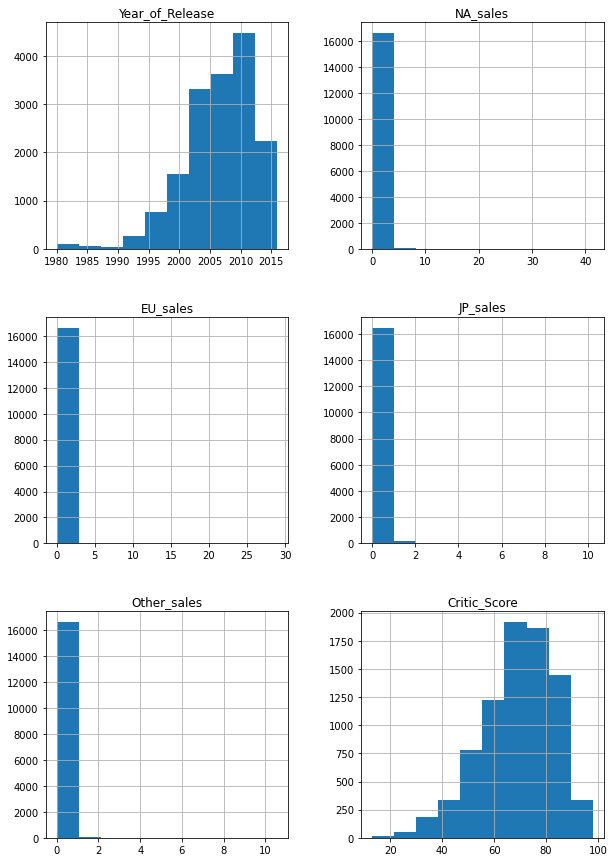

In [3]:
import matplotlib.pyplot as plt
data.hist(figsize=(10, 15))

### Предобработка данных


#### Приведение названия столбцов к нижнему регистру


In [4]:
data.columns = data.columns.str.lower()

#### Пропуски

In [5]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


<div class="alert alert-info">
<b>
    Пропуски обнаружены в столбцах с информацией о названии, дате выпуска, оценке критиков, пользователей и рейтинге.
</b> 
</div>

In [6]:
data['year_of_release'] = data['year_of_release'].fillna('0')

<div class="alert alert-info">
<b>
    В столбце с годом выпуска пропуски заменим на 0, поскольку такого значения быть не может, это будет маркером.
</b> 
</div>

In [7]:
data = data.dropna(subset=['name'])

<div class="alert alert-info">
<b>
    В столбцах с данными о названии и жанре обнаружено по два пропуска, как выяснилось, 
    эти пропуски принадлежат одним и тем же строкам, вместе с пропусками данных о рейтинге. Поскульку таких строк всего две,
    их удаление не повлияет на общую картину.
</b> 
</div>

In [8]:
data['critic_score'] = data['critic_score'].fillna('-5')
data['user_score'] = data['user_score'].fillna('-5')
data['user_score'] = data['user_score'].replace('tbd', '-5')
data['rating'] = data['rating'].fillna('0')

<div class="alert alert-info">
<b>
    В столбцах с данными об оценках критиков и пользователей достаточно пропусков. Помимо них в столбце user_score встречается 
    значение "tbd", что означает, что информация еще не определена и только будет заполнена в дальнейшем. Это может быть 
    связано с тем, что еще недостаточно пользователей оценили игру. В этих столбцах заменим пропуски на знаения, которых 
    не может быть, они будут маркерами.
</b> 
</div>

In [9]:
print(data.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


<div class="alert alert-info">
<b>
    Причины, которые могли привести к пропускам:
    <ul>
        <li> Технические ошибки</li>
        <li> 
            К пропускам в столбцах с оценкой пользователей и критиков могло привести то, что еще недостаточное 
            количество пользователей успели ее попробовать, поэтому рейтинг еще установлен
        </li>
        <li> Где-то пропуск может означать 0. Пользователь просто не стал указывать это</li>
        <li> 
            Пропуски в столбце с рейтингом могут быть обусловлены тем, что игра подходит к разным категориям, но не 
            ко всем опять же, то есть нельзя определить ее категорию
        </li>
    </ul>    
</b> 
</div>

#### Преобразование данных к нужным типам

In [10]:
data['critic_score'] = data['critic_score'].astype('int')

<div class="alert alert-info">
<b>
    Оценка критиков принимает значения от 0 до 100, поэтому это только целые значения. Для этого столбца применим целочисленный
    тип данных.
</b> 
</div>

In [11]:
data['user_score'] = data['user_score'].astype('float')

<div class="alert alert-info">
<b>
    Оценка пользователей принимает значения от 0 до 10, и может принимать не целые значения. Для этого столбца применим 
    вещественный тип данных.
</b> 
</div>

In [12]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('int')

<div class="alert alert-info">
<b>
    Данные о дате содрежат тольо год выпуска, поэтому не имеет смысла приводить их типу данных datetime. Удобнее будет
    использовать целочисленный тип.
</b> 
</div>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


#### Суммарные продажи

In [14]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [15]:
print(data.head(10))

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45            76         8.0      E   
1     29.08      3.58      6.81         0.77 

<div class="alert alert-info">
<b>
    Вывод
    <ul>
        В данном разделе были выполнены следующие шаги:
        <li> Выявлены пропуски в данных </li>
        <li> Пропуски в данных заполнены или удалены, там, где это необходимо и не вредит общей статистике</li>
        <li> Описаны возможные причины появления пропусков в данных </li>
        <li> Там, где необходимо, изменены типы данных </li>
        <li> Добавлен новый столбец с данными о суммарных продажах </li>
    </ul>
</b> 
</div>

### Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы?

In [16]:
print(data.loc[data['year_of_release'] != 0].groupby('year_of_release')['name'].count())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


<AxesSubplot:title={'center':'Год выпуска'}, xlabel='год', ylabel='количество'>

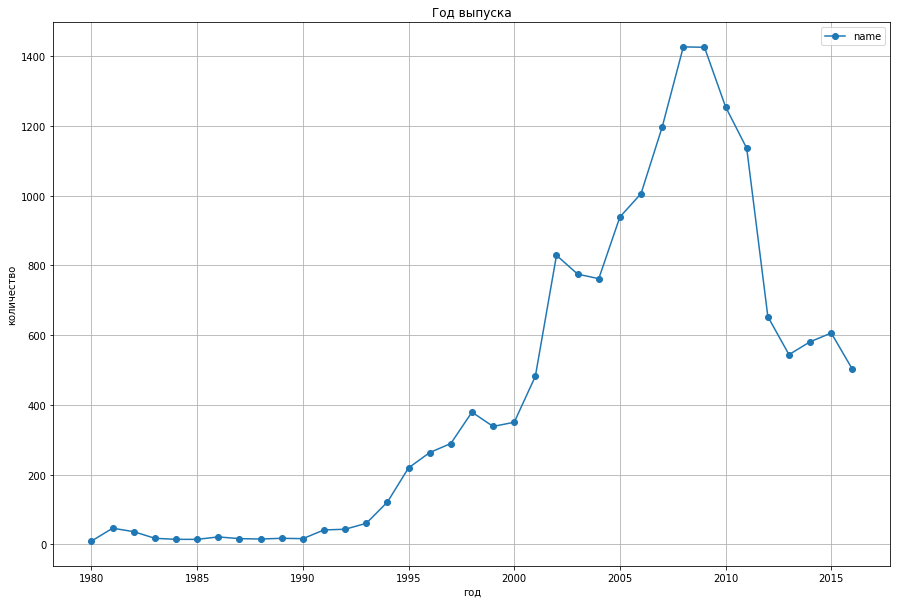

In [37]:
(
    data.query('year_of_release != 0').
        pivot_table(index='year_of_release', values='name', aggfunc='count').
        plot(grid=True, figsize=(15, 10), style='o-', title='Год выпуска', xlabel='год', ylabel='количество')
)

<div class="alert alert-info">
<b>
    В период с 1980 по 1993 количество выпускаемых игр не превышало 100. После 1993 года количество выпускаемых игр стало 
    заметно расти и достигло пика в 2008 году. С 2009 года количество выпускаемых игр стало уменьшаться. 
    <p>
    Однако не все периоды важны для анализа. Можно взять данные за период с 2000 года, там есть и заметное увеличение, и 
    уменьшение количества выпускаемых игр.
    </p>
</b> 
</div>

#### Как менялись продажи по платформам?

In [17]:
print(data.groupby('platform')['total_sales'].sum())

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       28.35
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64


<AxesSubplot:xlabel='platform'>

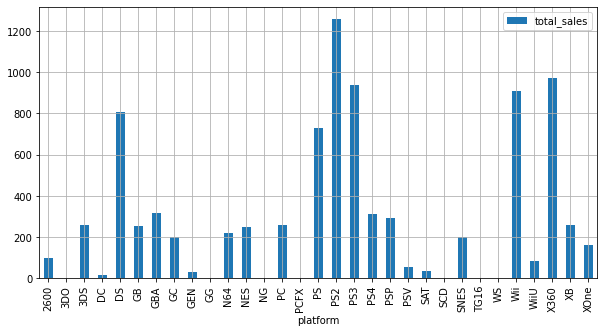

In [18]:
(
    data.
        pivot_table(index='platform', values='total_sales', aggfunc='sum').
        plot(grid=True, figsize=(10, 5), kind='bar' )
)

<div class="alert alert-info">
<b>
    Среди всех платформ есть 6, значение общих продаж которых, значительно превышает остальные. Для дальнейшего анализа 
    рассмотрим именно их: 
    <ul>
        <li>PS2</li>
        <li>X360</li>
        <li>PS3</li>
        <li>Wii</li>
        <li>DS</li>
        <li>PS</li>
    </ul>    
</b> 
</div>

<AxesSubplot:xlabel='platform'>

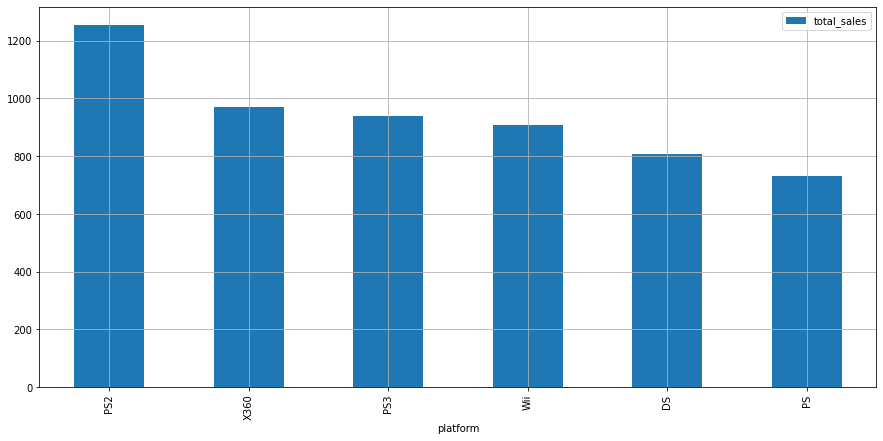

In [19]:
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum').
        sort_values(by='total_sales', ascending = False)[:6].
                plot(kind='bar', grid=True, figsize=(15,7))
)

In [20]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

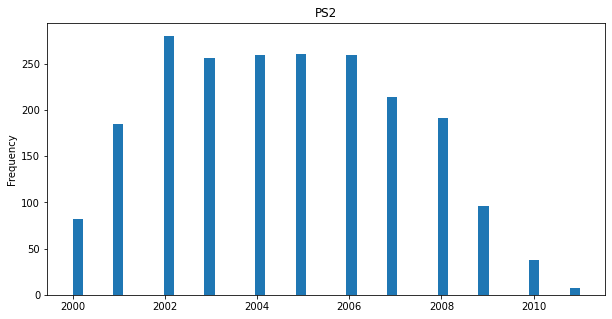

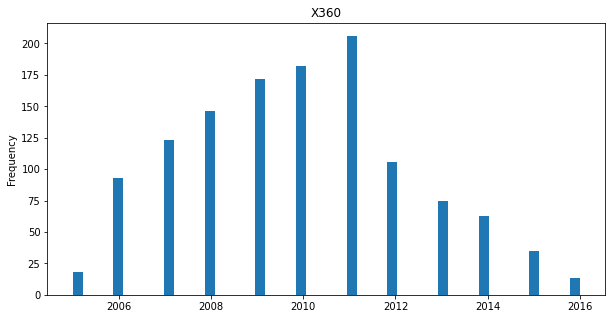

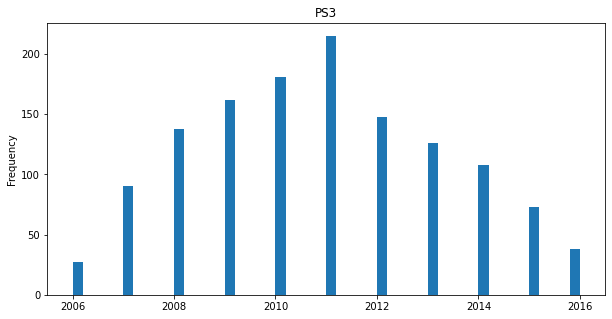

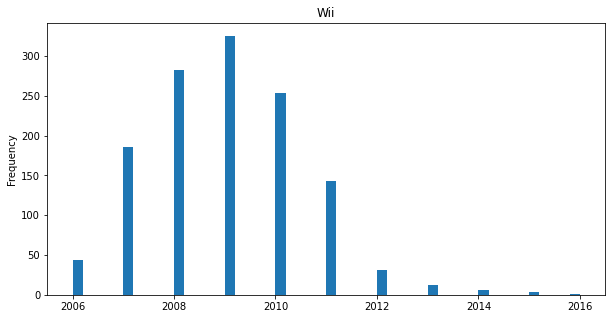

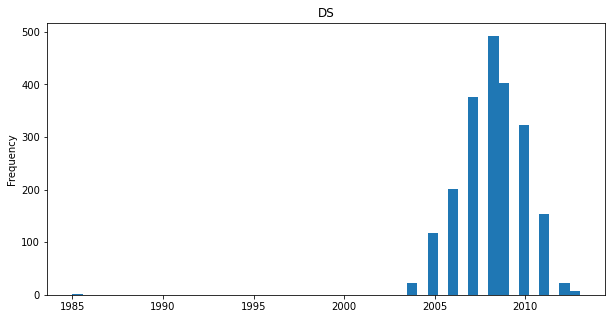

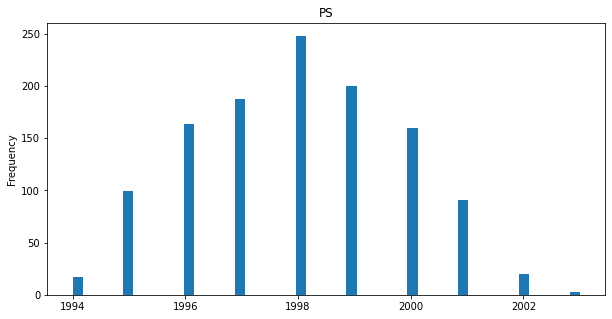

In [21]:
for val in top_platform:
    plt.figure()
    data.query('year_of_release != 0 & platform == @val')['year_of_release'].plot(kind='hist', bins=50, figsize=(10,5), title = val)
    plt.show()


<div class="alert alert-info">
<b>
    Согласно графику для всех платформ существует характерный срок существования - 10 лет. 
</b> 
</div>

#### Какие платформы лидируют по продажам, растут или падают?

In [23]:
(
    data.query('year_of_release > 2013').
        pivot_table(index='platform', values='total_sales', aggfunc='sum').
            sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


<Figure size 432x288 with 0 Axes>

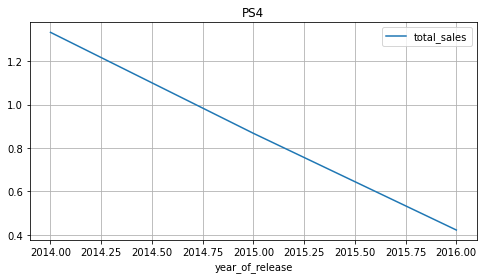

<Figure size 432x288 with 0 Axes>

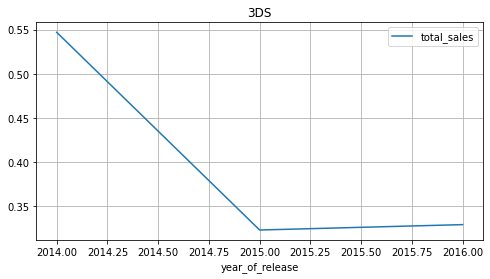

<Figure size 432x288 with 0 Axes>

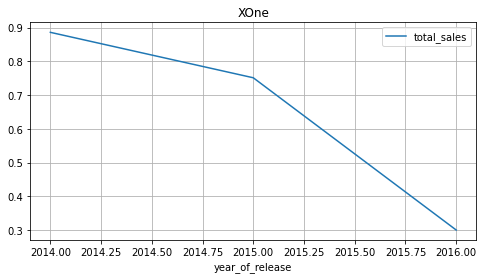

<Figure size 432x288 with 0 Axes>

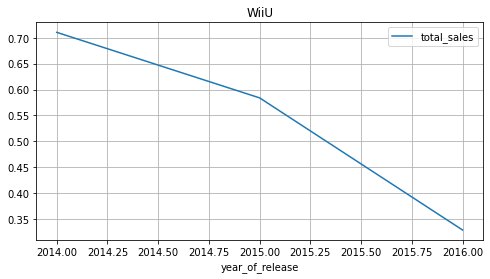

<Figure size 432x288 with 0 Axes>

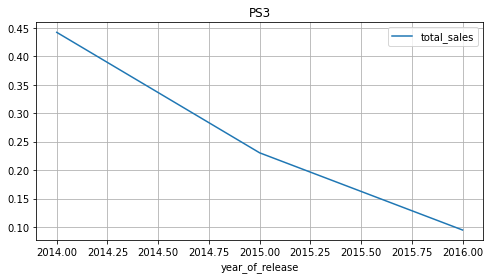

<Figure size 432x288 with 0 Axes>

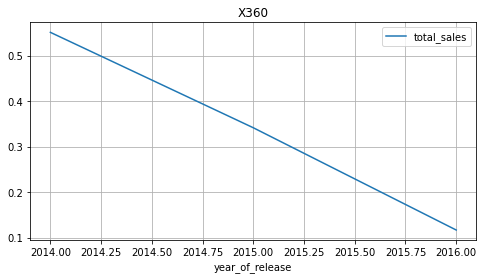

<Figure size 432x288 with 0 Axes>

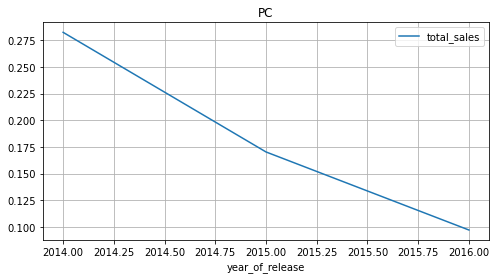

<Figure size 432x288 with 0 Axes>

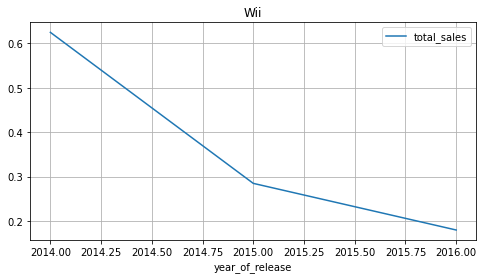

<Figure size 432x288 with 0 Axes>

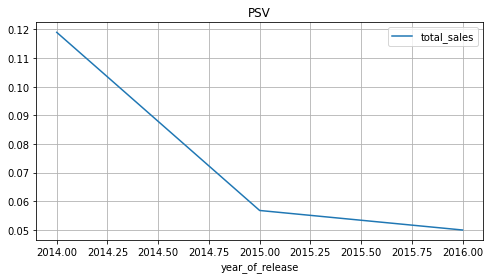

<Figure size 432x288 with 0 Axes>

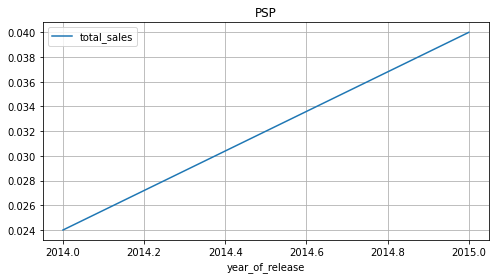

In [24]:
for val in data.query('year_of_release > 2013')['platform'].unique():
    plt.figure()
    (
        data.
            query('platform == @val & year_of_release > 2013').
                pivot_table(index='year_of_release', values='total_sales').
                    plot(grid=True, figsize=(8, 4), title=val)
    )
    plt.show()

<div class="alert alert-info">
<b>
    По продажам за последние 10 лет лидируют: PS4, PS3, X360. Заметно упали продажи за последние два года у платформы "WiiU", 
    "PSV". У платформы "PSP" продажи за последний год выросли, на нее стоит обратить внимание.
</b> 
</div>

#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

(0.0, 2.0)

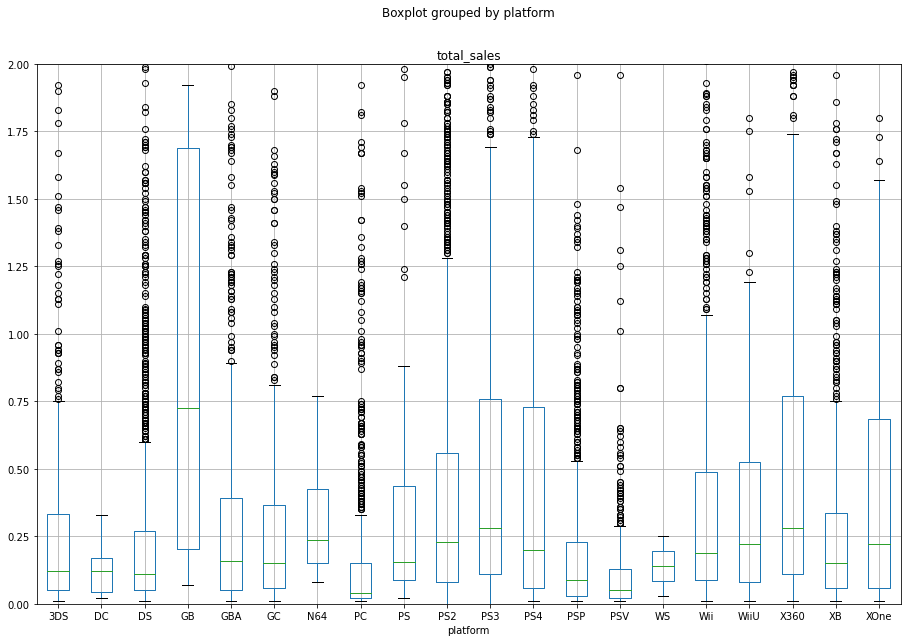

In [51]:
(
    data.query('year_of_release > 2000').
            boxplot('total_sales', by='platform', figsize=(15,10))
)
plt.ylim(0, 2)

In [26]:
print(data['total_sales'].describe())

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


<div class="alert alert-info">
<b>
    Медиианное значение по всем платформам примерно одинаковое. Почти у всех платформ есть выбросы данных. 
</b> 
</div>

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Корреляция между отзывами критиков и продажами - 0.14571486985972767


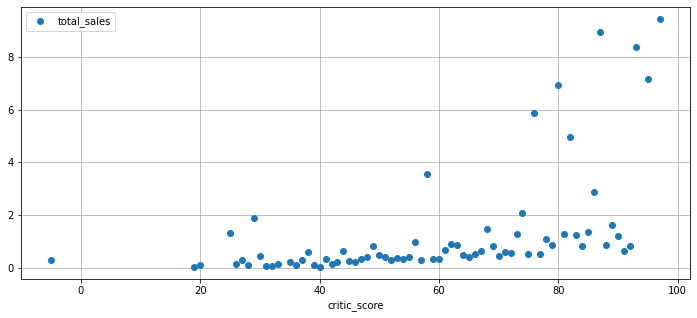

In [27]:
(
    data.query('platform == "Wii"').pivot_table(index='critic_score', values='total_sales')
    .plot(grid=True, figsize=(12, 5), style='o')
)
print('Корреляция между отзывами критиков и продажами -', data['critic_score'].corr(data['total_sales']))

<div class="alert alert-info">
<b>
    Основная масса точек на графике находится в одном диапазоне значений продаж, да есть выбросы для игр с высоким рейтингом,
    но их не много. Корреляция между отзывами критиков и продажами составила 0.146, следовательно взаимосвязь между этими
    параметрами небольшая, а значит, продажи не зависят от оценки критиков.
</b> 
</div>

Корреляция между отзывами пользователей и продажами - 0.13151168572979494


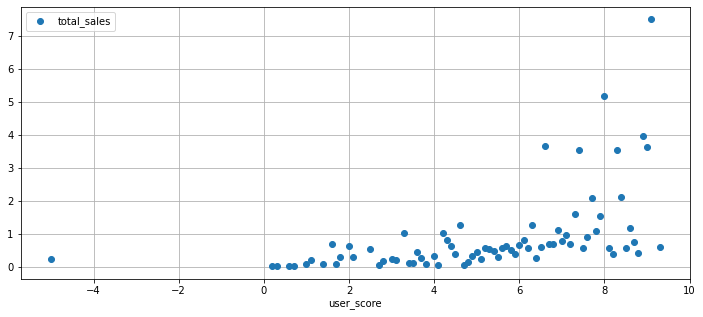

In [28]:
(
    data.query('platform == "Wii"').pivot_table(index='user_score', values='total_sales')
    .plot(grid=True, figsize=(12, 5), style='o')
)
print('Корреляция между отзывами пользователей и продажами -', data['user_score'].corr(data['total_sales']))

<div class="alert alert-info">
<b>
    Аналогично оценке критиков, большая часть точек на графике находится в одном интервале с небольшим количеством выбросов.
    Корреляция между отзывами пользователей и проадажами составила 0.131, значит продажи не зависят от оценки пользователей.
</b> 
</div>

<Figure size 432x288 with 0 Axes>

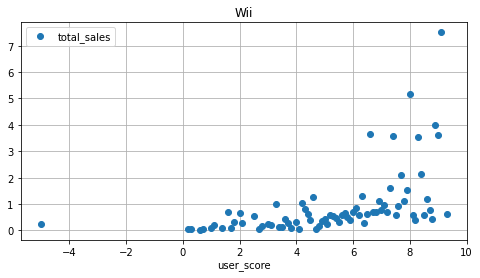

<Figure size 432x288 with 0 Axes>

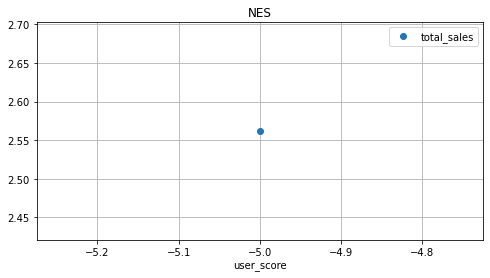

<Figure size 432x288 with 0 Axes>

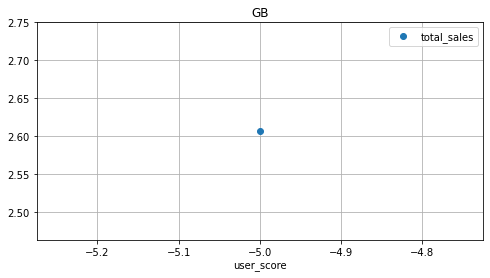

<Figure size 432x288 with 0 Axes>

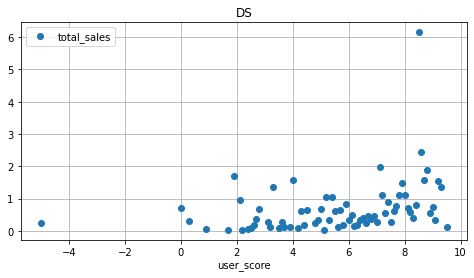

<Figure size 432x288 with 0 Axes>

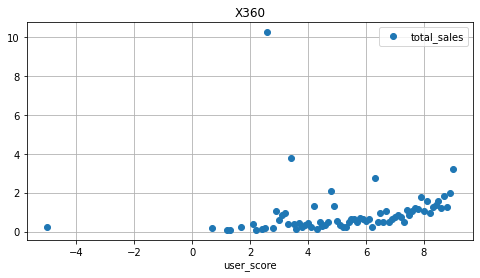

<Figure size 432x288 with 0 Axes>

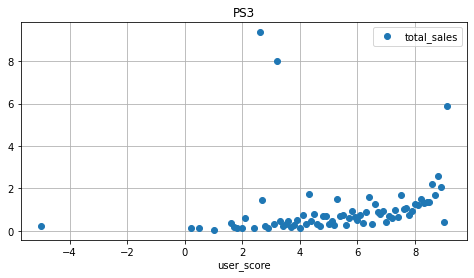

<Figure size 432x288 with 0 Axes>

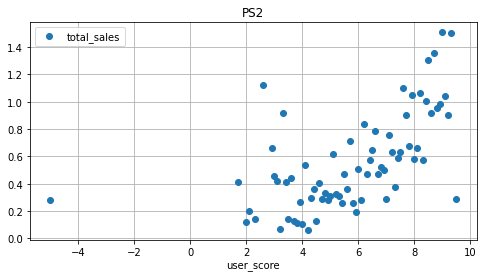

<Figure size 432x288 with 0 Axes>

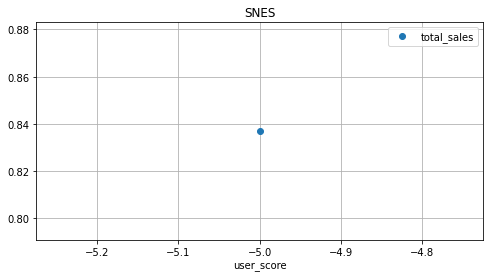

<Figure size 432x288 with 0 Axes>

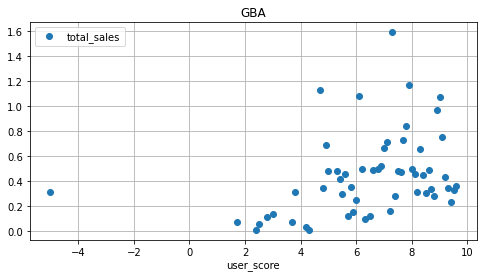

<Figure size 432x288 with 0 Axes>

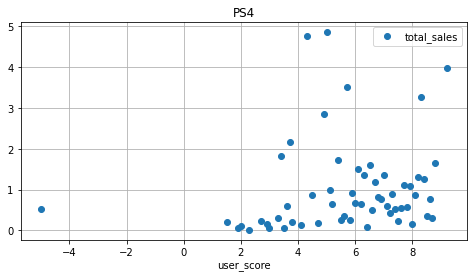

<Figure size 432x288 with 0 Axes>

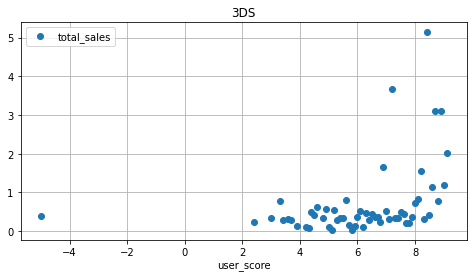

<Figure size 432x288 with 0 Axes>

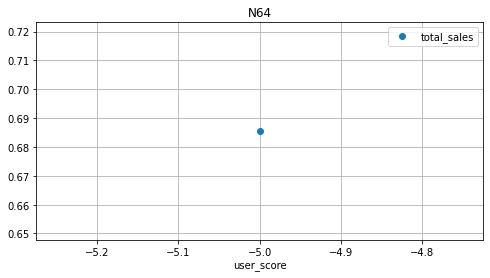

<Figure size 432x288 with 0 Axes>

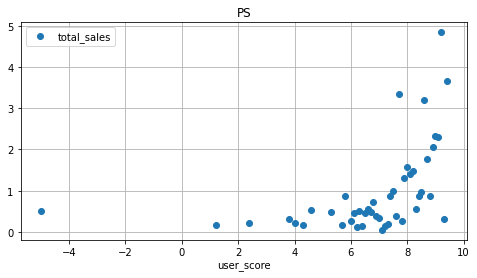

<Figure size 432x288 with 0 Axes>

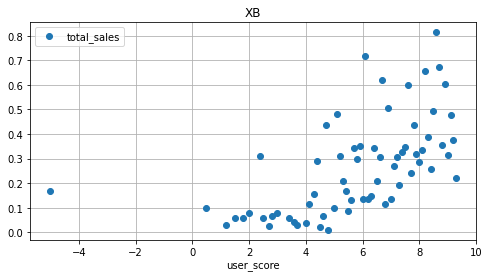

<Figure size 432x288 with 0 Axes>

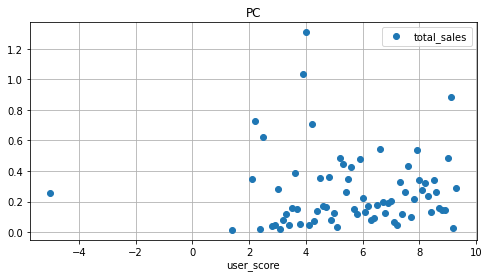

<Figure size 432x288 with 0 Axes>

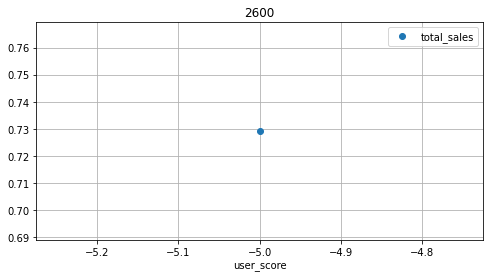

<Figure size 432x288 with 0 Axes>

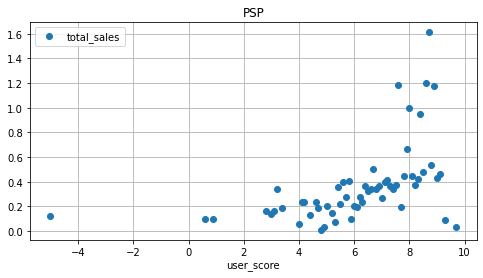

<Figure size 432x288 with 0 Axes>

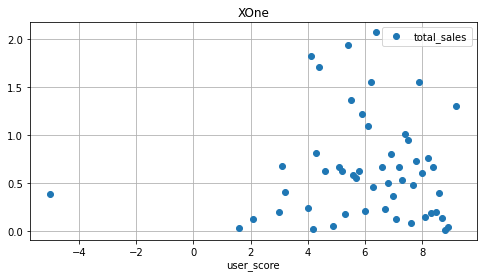

<Figure size 432x288 with 0 Axes>

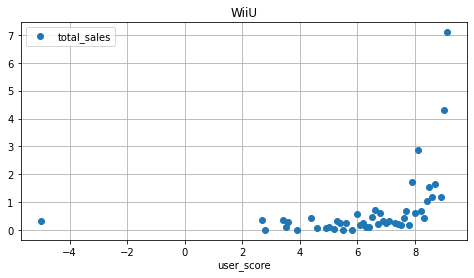

<Figure size 432x288 with 0 Axes>

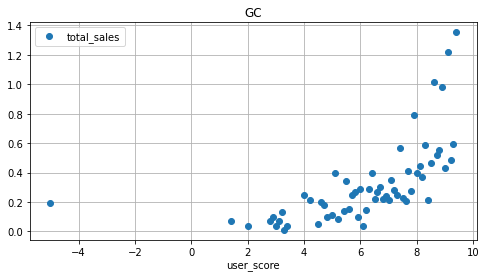

<Figure size 432x288 with 0 Axes>

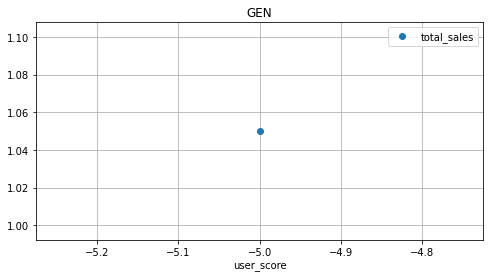

<Figure size 432x288 with 0 Axes>

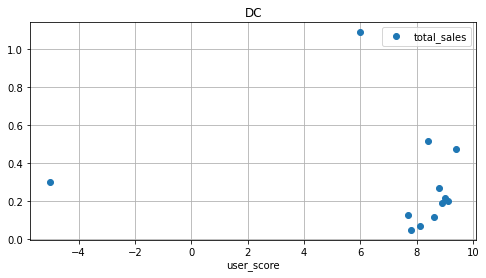

<Figure size 432x288 with 0 Axes>

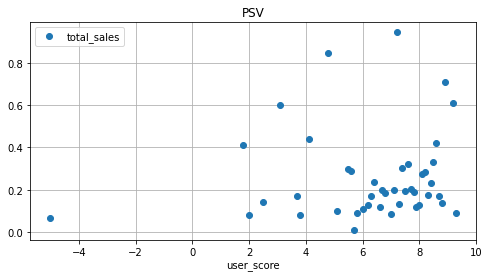

<Figure size 432x288 with 0 Axes>

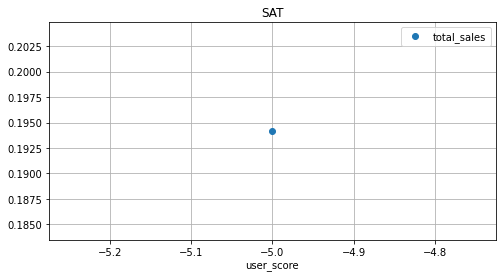

<Figure size 432x288 with 0 Axes>

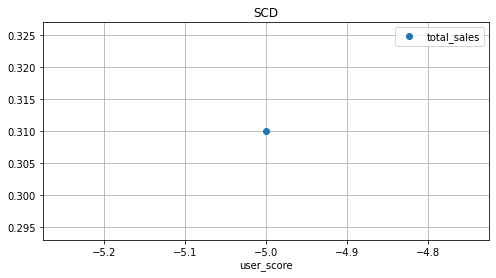

<Figure size 432x288 with 0 Axes>

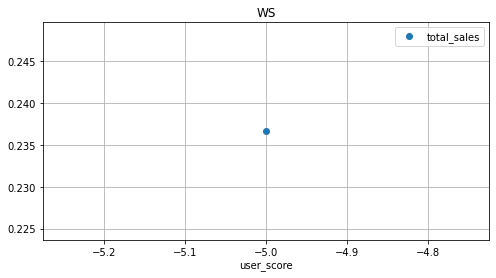

<Figure size 432x288 with 0 Axes>

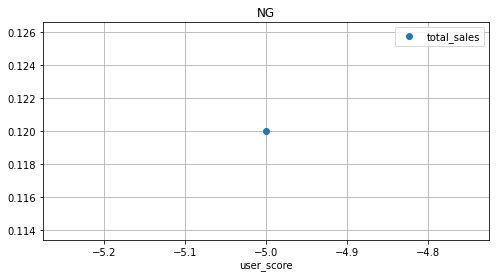

<Figure size 432x288 with 0 Axes>

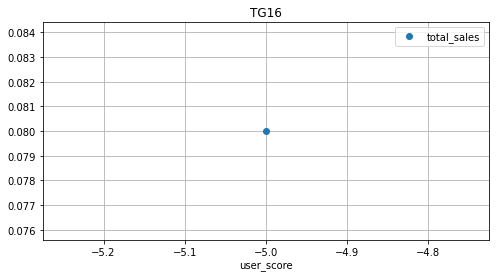

<Figure size 432x288 with 0 Axes>

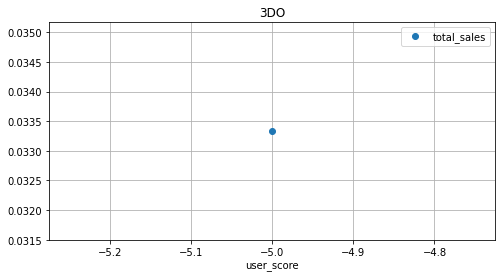

<Figure size 432x288 with 0 Axes>

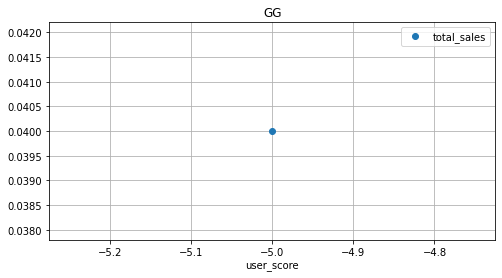

<Figure size 432x288 with 0 Axes>

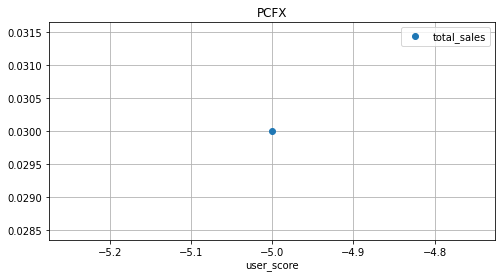

In [29]:
for val in data['platform'].unique():
    plt.figure()
    (
        data.
            query('platform == @val').
                pivot_table(index='user_score', values='total_sales').
                    plot(grid=True, figsize=(8, 4), style='o', title=val)
    )
    plt.show()


<Figure size 432x288 with 0 Axes>

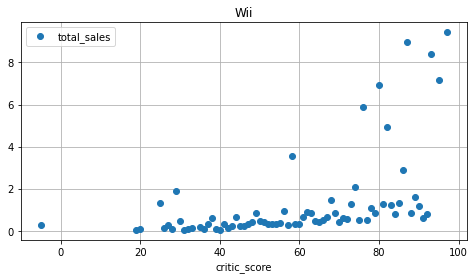

<Figure size 432x288 with 0 Axes>

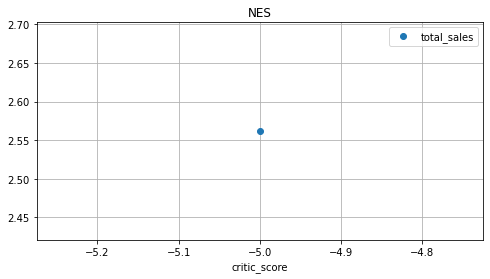

<Figure size 432x288 with 0 Axes>

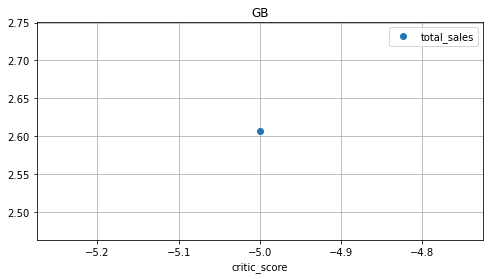

<Figure size 432x288 with 0 Axes>

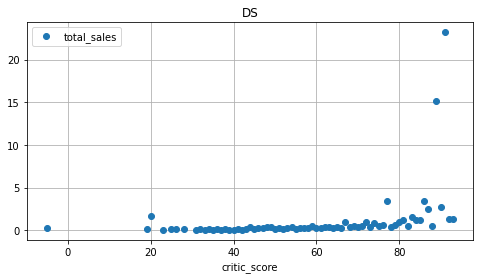

<Figure size 432x288 with 0 Axes>

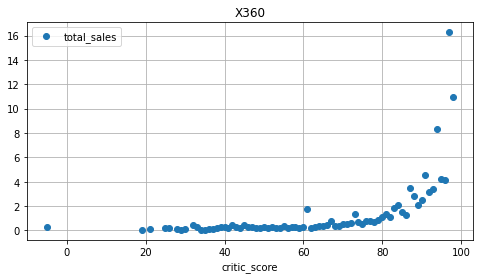

<Figure size 432x288 with 0 Axes>

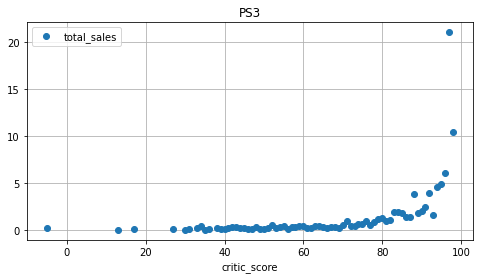

<Figure size 432x288 with 0 Axes>

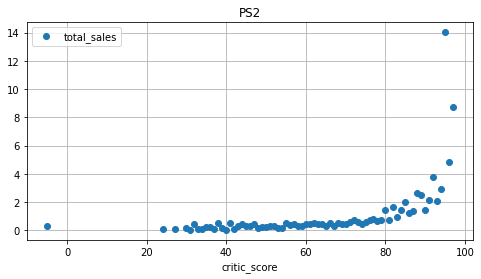

<Figure size 432x288 with 0 Axes>

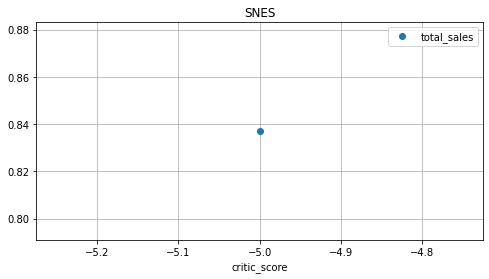

<Figure size 432x288 with 0 Axes>

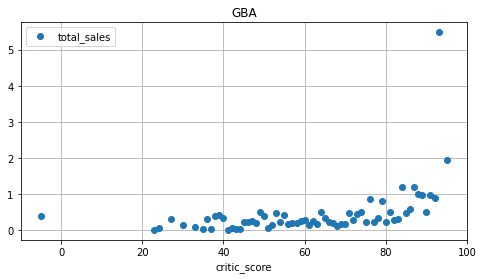

<Figure size 432x288 with 0 Axes>

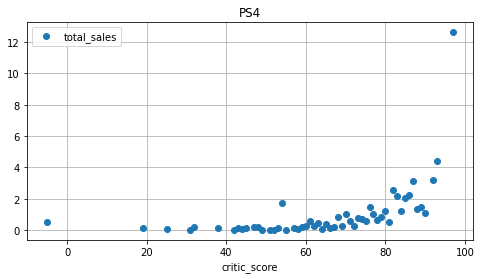

<Figure size 432x288 with 0 Axes>

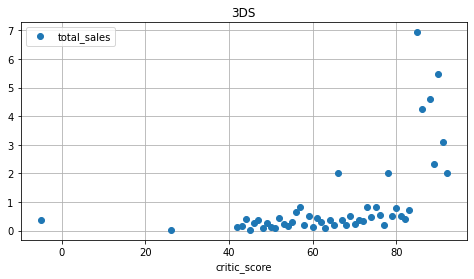

<Figure size 432x288 with 0 Axes>

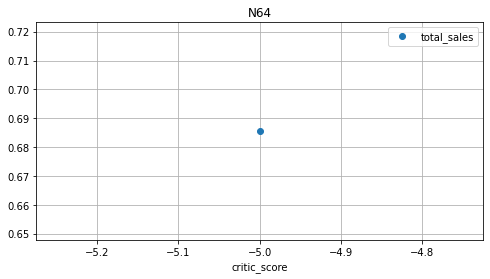

<Figure size 432x288 with 0 Axes>

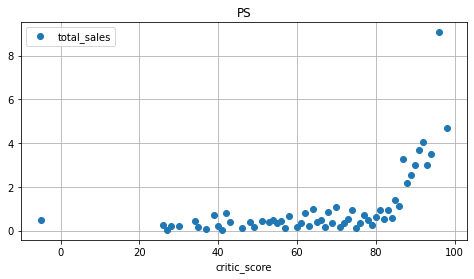

<Figure size 432x288 with 0 Axes>

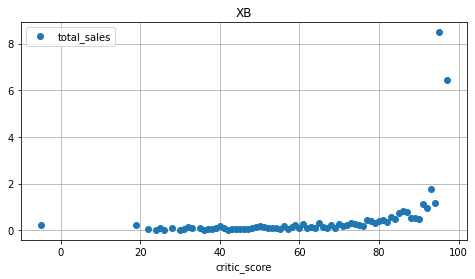

<Figure size 432x288 with 0 Axes>

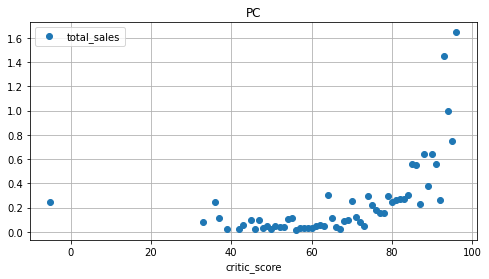

<Figure size 432x288 with 0 Axes>

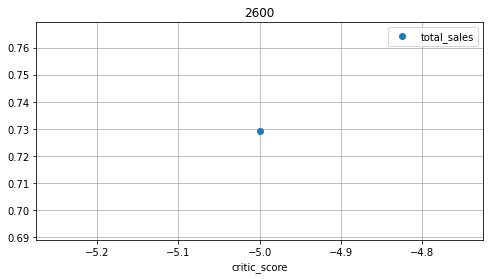

<Figure size 432x288 with 0 Axes>

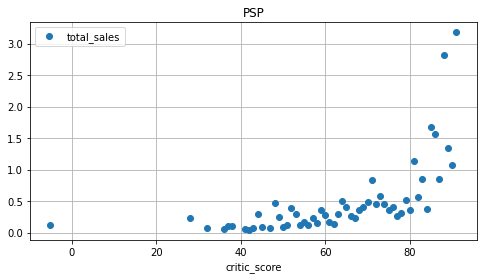

<Figure size 432x288 with 0 Axes>

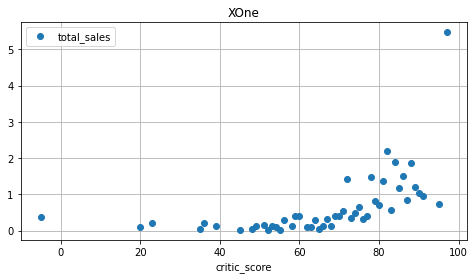

<Figure size 432x288 with 0 Axes>

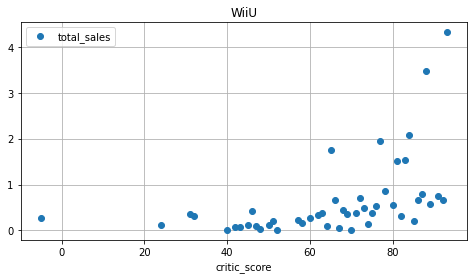

<Figure size 432x288 with 0 Axes>

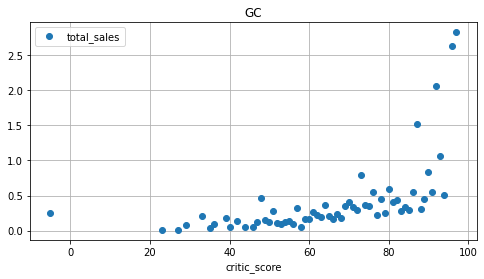

<Figure size 432x288 with 0 Axes>

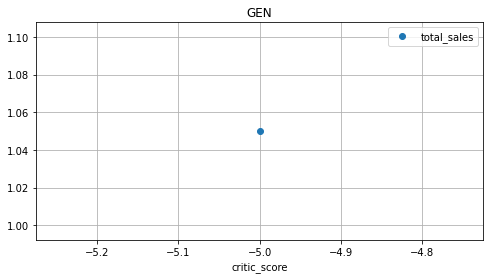

<Figure size 432x288 with 0 Axes>

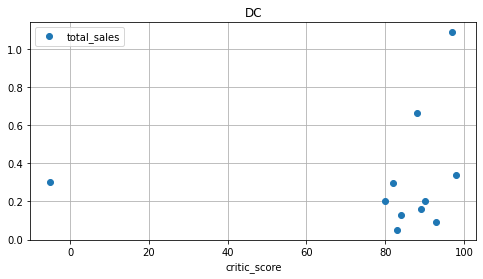

<Figure size 432x288 with 0 Axes>

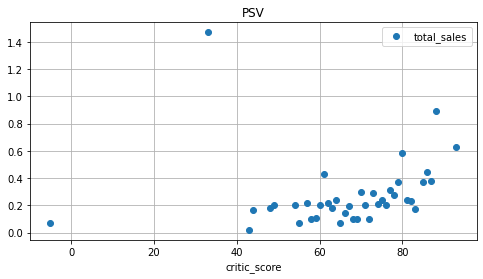

<Figure size 432x288 with 0 Axes>

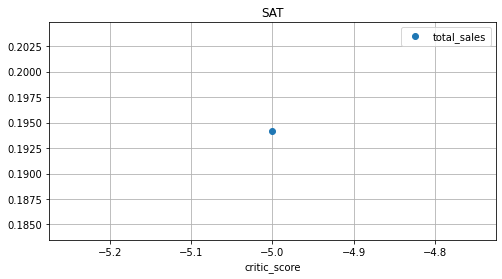

<Figure size 432x288 with 0 Axes>

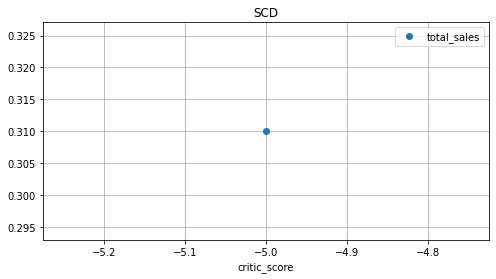

<Figure size 432x288 with 0 Axes>

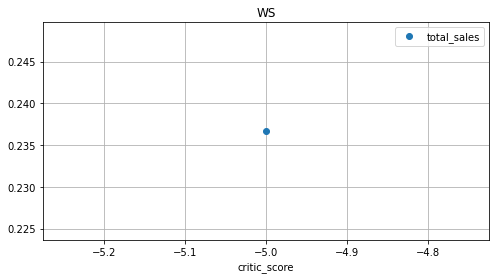

<Figure size 432x288 with 0 Axes>

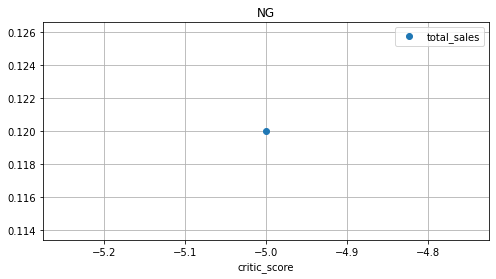

<Figure size 432x288 with 0 Axes>

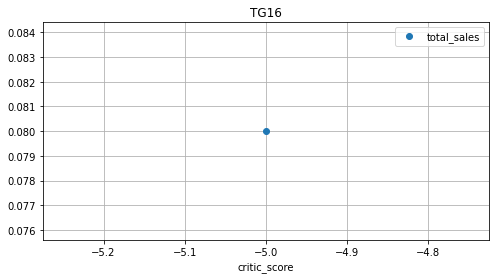

<Figure size 432x288 with 0 Axes>

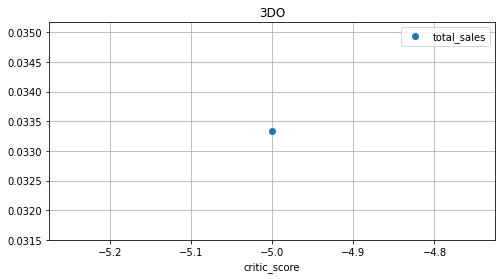

<Figure size 432x288 with 0 Axes>

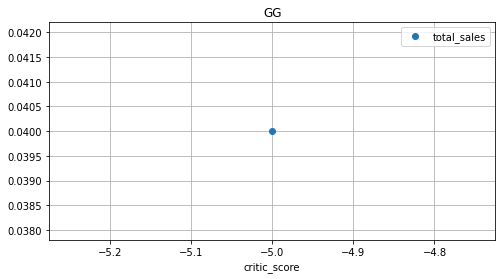

<Figure size 432x288 with 0 Axes>

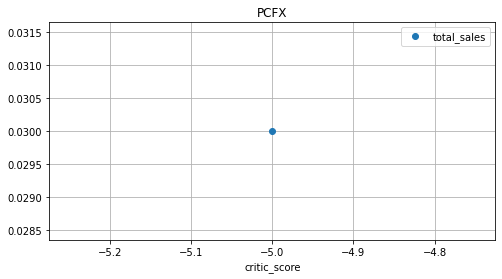

In [30]:
for val in data['platform'].unique():
    plt.figure()
    (
        data.
            query('platform == @val').
                pivot_table(index='critic_score', values='total_sales').
                    plot(grid=True, figsize=(8, 4), style='o', title=val)
    )
    plt.show()

<div class="alert alert-info">
<b>
    Распределение оценки критиков для большей части платформ совпадает с распределенем для платформы "Wii". Точки находятся 
    в одной области. В случае оценки пользователей некоторые платформы ведут себя иначе. Количество проданных игр больше 
    среднего как для игр с низким рейтингом, так и для игр с высоким рейтингом.
</b> 
</div>

#### Общее распределение игр по жанрам.

In [31]:
print(data.groupby('genre')['name'].count())

genre
Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: name, dtype: int64


In [54]:
data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


<div class="alert alert-info">
<b>
    При рассмотрении медианных продаж выявлены наиболее высокодоходные жанры - Platform, Shooter, Sports.
    Три наиболее популярных жанра - Action, Adventure, Fighting
</b> 
</div>

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

In [33]:
data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


In [34]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


In [35]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


<div class="alert alert-info">
<b>
    Наибольшая доля продаж игр приходится на Северную Америку. Доля продаж самой популярной в Америке платформы в два раза
    превышает долю продаж самой популярной платформы в Европе и почти в четыре раза в Японии.
</b> 
</div>

#### Самые популярные жанры (топ-5)

In [36]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


In [37]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


In [38]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


<div class="alert alert-info">
<b>
    Для всех регионов в топ-5 попали игры жанров Action, Sports, Misc. Помимо этого в Северной Америке отдают предпочтение 
    жанрам Shooter и Platform, в Европе Shooter и Racing, в Японии Role-Playing и Platform.
</b> 
</div>

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [55]:
print(data['rating'].unique())

['E' '0' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


<AxesSubplot:xlabel='rating'>

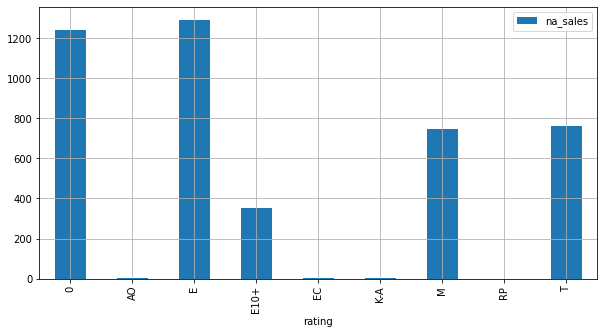

In [64]:
data.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 5), style='o')

<AxesSubplot:xlabel='rating'>

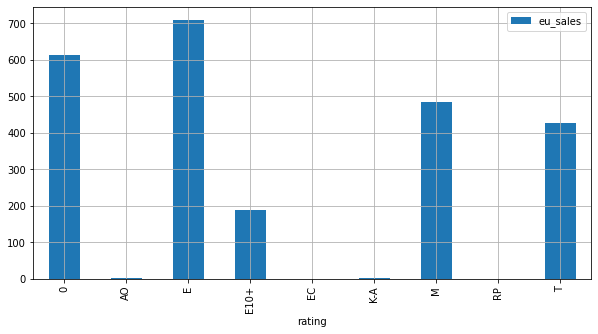

In [63]:
data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 5), style='o')

<AxesSubplot:xlabel='rating'>

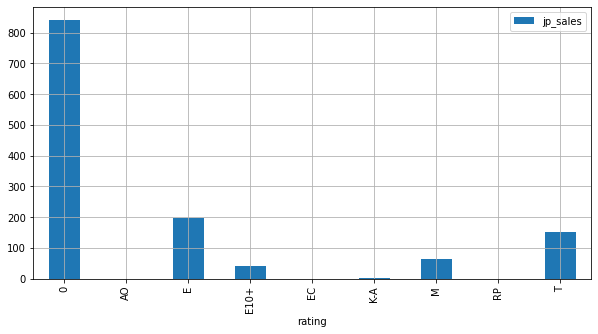

In [62]:
data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 5))

<div class="alert alert-info">
<b>
    Система ESRB создавалась для определения рейтинга развлекательного ПО в США и Канаде. В европейских странах и Японии
    существуют свои рейтинговые системы. Это обуславливает то, что у большей части выпускаемых в Японии игр нет принадлежности 
    к какой-либо категории по данной рейтинговой системе. То есть, пользователи из Японии не следят за данным рейтингом. Что
    касается пользователей из Европы, они в основном покупают игры с оценкой "для всех" или игры без оценки по данной 
    рейтинговой системе.
</b> 
</div>

### Проверка гипотезы

<div class="alert alert-info">
<b>
    Для проверки гипотез будем использовать критерий Стьюдента. Данные генеральные совокупности не зависят друго от друга, их 
    дисперсии равны и выборочные средние нормально распределены. Проверим гипотезу о равеснстве среднего двух генеральных 
    совокупностей.
</b> 
</div>

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средний пользовательский рейтинг (user_score) "Xbox One" = Средний пользовательский рейтинг "PC"`
H_a: Средний пользовательский рейтинг (user_score) "Xbox One" ≠ Средний пользовательский рейтинг "PC"`
alpha = 0.05
```

In [69]:
from scipy import stats as st

In [73]:
pc = data.query('platform == "PC"')['user_score']
xbox = data.query('platform == "XOne"')['user_score']

results = st.ttest_ind(pc, xbox)
alpha = 0.05
 
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.004193548877591475
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>
    Таким образом, средние пользовательские рейтнги платформ Xbox One и PC разные.
</b> 
</div>

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

```
H_0: Средний пользовательский рейтинг (user_score) жанра "Action" = Средний пользовательский рейтинг жанра "Sports"`
H_a: Средний пользовательский рейтинг (user_score) жанра "Action" ≠ Средний пользовательский рейтинг жанра "Sports"`
alpha = 0.05
```

In [72]:
action = data.query('genre == "Action"')['user_score']
sports = data.query('genre == "Sports"')['user_score']

results = st.ttest_ind(action, sports)
alpha = 0.05
 
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4490604996610403e-08
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>
    Таким образом, средние пользовательские рейтнги жанров Action и Sports разные.
</b> 
</div>

### Вывод

<div class="alert alert-info">
<b>
    <ul>
        <li> Выявлена и обработаны пропуски в данных </li>
        <li> Изменены типы данных, где это необходимо </li>
        <li> За последние 20 лет, в сравнении с более ранним периодом, количество выпускаемых игр заметно увеличилось.
             Однако, за последние 8 лет оно уменьшалось.
        </li>
        <li> Платформы, лидирующие по продажам за последние 20 лет: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
             Характерный срок существования платформы - 10 лет.
        </li>
        <li> По продажам за последние 4 года лидируют: PS4, PS3, X360. Заметно упали продажи за последние два года у платформы
             "WiiU", "PSV". У платформы "PSP" продажи за последний год выросли, на нее стоит обратить внимание.
        </li>
        <li> Продажи игр не зависят от оценок критиков и пользователей. </li>
        <li> 
            При рассмотрении медианных продаж выявлены наиболее высокодоходные жанры - Platform, Shooter, Sports.
            Три наиболее популярных жанра - Action, Adventure, Fighting.
        </li>
        <li> Наибольшая доля продаж игр приходится на Северную Америку, затем идет Европа и далее Япония. </li>
        <li> Для всех регионов в топ-5 попали игры жанров Action, Sports, Misc. </li>
        <li> 
            За рейтингом следят в основном пользователи из Америки, а для Европы и Японии самыми продаваемыми являются, как раз
            игры без оценки данной рейтинговой системы.
        </li>
    </ul>    
</b> 
</div>